# Assignment 2 
Goal: To findout the person has donated blood in March 2007 or not ? (The given binary varibale shows either 1 indicate for donated in 2007 March or 0 indicate for not donated in 2007 March)

In [2]:
blood_transfusion = 'transfusion.data'

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
transfusion = pd.read_csv(blood_transfusion, sep=',' , decimal = '.' , header=0 , names=['Recency','Frequency','Monetary','Time','Donated Blood'])

In [8]:
print(transfusion.shape)

(748, 5)


In [9]:
transfusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Recency        748 non-null    int64
 1   Frequency      748 non-null    int64
 2   Monetary       748 non-null    int64
 3   Time           748 non-null    int64
 4   Donated Blood  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [10]:
transfusion.dtypes


Recency          int64
Frequency        int64
Monetary         int64
Time             int64
Donated Blood    int64
dtype: object

In [11]:
tt = transfusion.copy()
tt.shape

(748, 5)

In [12]:
tt.drop_duplicates()
tt.shape

(748, 5)

In [13]:
transfusion.head(10)


,Recency,Frequency,Monetary,Time,Donated Blood
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1


In [14]:
transfusion.tail(10)

,Recency,Frequency,Monetary,Time,Donated Blood
738,23,1,250,23,0
739,23,4,1000,52,0
740,23,1,250,23,0
741,23,7,1750,88,0
742,16,3,750,86,0
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0
747,72,1,250,72,0


In [15]:
fake_transfusion= transfusion.copy()

In [16]:
print(fake_transfusion.loc[fake_transfusion['Recency'].isnull()])

Empty DataFrame
Columns: [Recency, Frequency, Monetary, Time, Donated Blood]
Index: []


In [17]:
print(fake_transfusion.loc[fake_transfusion['Frequency'].isnull()])

Empty DataFrame
Columns: [Recency, Frequency, Monetary, Time, Donated Blood]
Index: []


In [18]:
print(fake_transfusion.loc[fake_transfusion['Monetary'].isnull()])

Empty DataFrame
Columns: [Recency, Frequency, Monetary, Time, Donated Blood]
Index: []


In [19]:
print(fake_transfusion.loc[fake_transfusion['Time'].isnull()])

Empty DataFrame
Columns: [Recency, Frequency, Monetary, Time, Donated Blood]
Index: []


In [20]:
print(fake_transfusion.loc[fake_transfusion['Donated Blood'].isnull()])

Empty DataFrame
Columns: [Recency, Frequency, Monetary, Time, Donated Blood]
Index: []


In [21]:
fake_transfusion['Recency'].value_counts()


2     173
4     156
11     84
14     76
16     63
23     50
21     44
9      20
3      13
1       9
7       8
5       6
12      6
8       6
0       5
6       5
13      5
10      3
15      2
18      2
38      2
72      1
17      1
20      1
22      1
25      1
26      1
35      1
39      1
40      1
74      1
Name: Recency, dtype: int64

In [22]:
fake_transfusion['Donated Blood'].value_counts()

0    570
1    178
Name: Donated Blood, dtype: int64

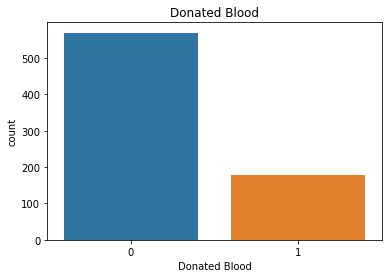

In [23]:
plot = plt.subplots(figsize=(6,4))
sns.countplot(x='Donated Blood', data=fake_transfusion)
plt.title("Donated Blood")
plt.show()

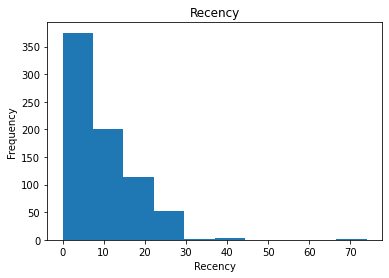

In [24]:
fake_transfusion['Recency'].plot(kind='hist',bins=10)
plt.title('Recency')
plt.xlabel('Recency')
plt.show()

>From the above histogram we can see that some datas are far from the mean distribution

In [25]:
fake_transfusion[['Recency']][fake_transfusion.Recency >= 30]

,Recency
495,35
496,38
497,38
498,40
499,74
746,39
747,72


> we are considering those Recency value more than 30 considered as an outliers and replaced with the mean value 

In [26]:
fake_transfusion['Recency'] = fake_transfusion['Recency'].transform(lambda x: np.where(x > 30, x.mean(), x))

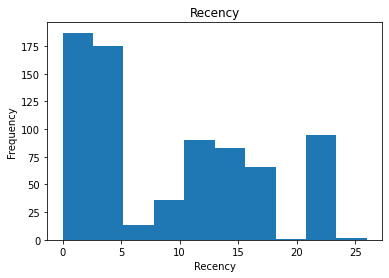

In [27]:
fake_transfusion['Recency'].plot(kind='hist',bins=10)
plt.title('Recency')
plt.xlabel('Recency')
plt.show()

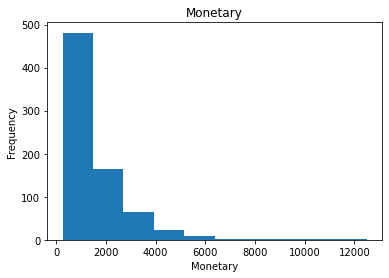

In [28]:
fake_transfusion['Monetary'].plot(kind='hist',bins=10)
plt.title('Monetary')
plt.xlabel('Monetary')
plt.show()

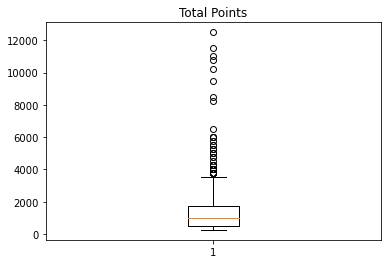

In [29]:
plt.boxplot(fake_transfusion['Monetary'])
plt.title('Total Points')
plt.show()

In [30]:
fake_transfusion[['Monetary']][fake_transfusion.Monetary > 6000]

,Monetary
0,12500
9,11500
341,9500
500,10750
502,8500
503,11000
504,6500
505,10250
517,8250


In [31]:
fake_transfusion['Monetary'] = fake_transfusion['Monetary'].transform(lambda x: np.where(x > 6000, x.mean(), x))

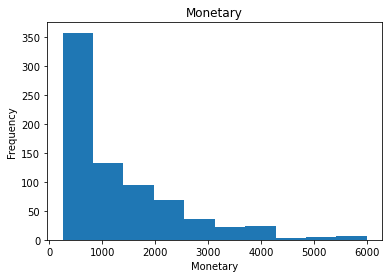

In [32]:
fake_transfusion['Monetary'].plot(kind='hist',bins=10)
plt.title('Monetary')
plt.xlabel('Monetary')
plt.show()

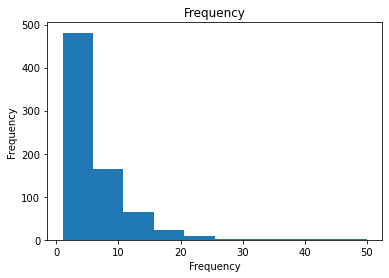

In [33]:
fake_transfusion['Frequency'].plot(kind='hist',bins=10)
plt.title('Frequency')
plt.xlabel('Frequency')
plt.show()

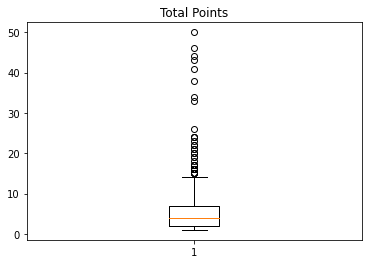

In [34]:
plt.boxplot(fake_transfusion['Frequency'])
plt.title('Total Points')
plt.show()

In [35]:
fake_transfusion['Frequency'] = fake_transfusion['Frequency'].transform(lambda x: np.where(x > 30, x.mean(), x))

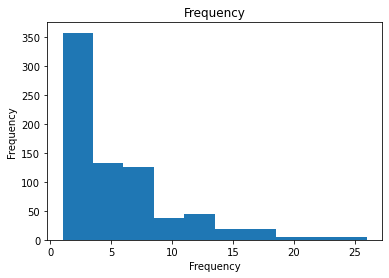

In [36]:
fake_transfusion['Frequency'].plot(kind='hist',bins=10)
plt.title('Frequency')
plt.xlabel('Frequency')
plt.show()

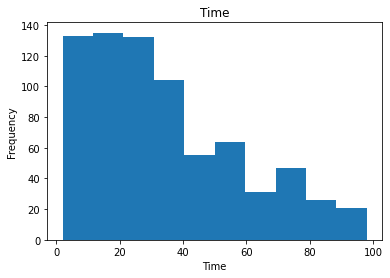

In [37]:
fake_transfusion['Time'].plot(kind='hist',bins=10)
plt.title('Time')
plt.xlabel('Time')
plt.show()

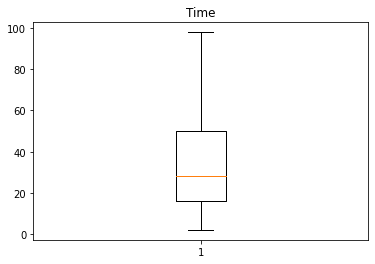

In [38]:
plt.boxplot(fake_transfusion['Time'])
plt.title('Time')
plt.show()

> By plotting two different kind of plot box plot and histogram we can see that there are no outliers, we are assuming that data are well distributed.

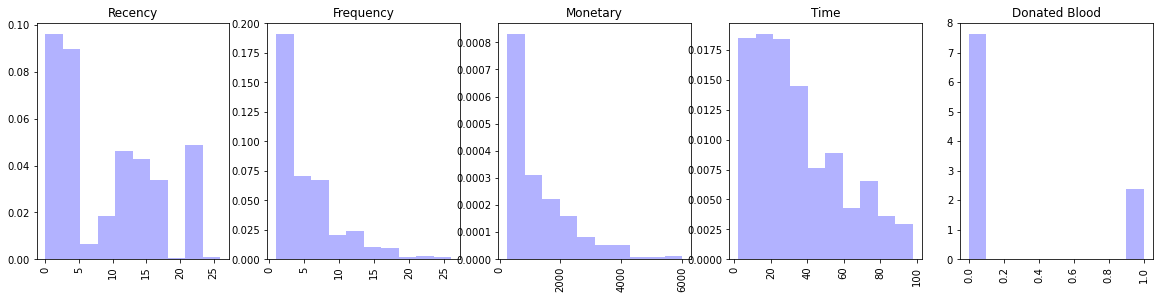

In [39]:
plt.figure(figsize=(20,20))
for i, col in enumerate(fake_transfusion.columns):
    plt.subplot(4,5,i+1)
    plt.hist(fake_transfusion[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')


> By plotting histogram of all the attributes we can see that only few people were donated blood in 2007.
> Similarly, we can noticed that Recency, Frequency and Monetary are linearly distributed and high co-related.

# Pie Chart of Donated Blood in 2007 distribution

In [40]:
fake_transfusion["Donated Blood"].value_counts()

0    570
1    178
Name: Donated Blood, dtype: int64

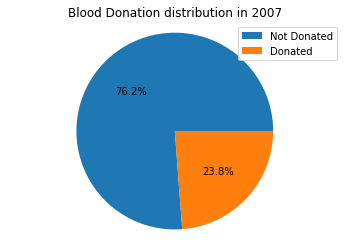

In [41]:
desc = ["Not Donated", "Donated"]
fig, plot = plt.subplots()
plot.pie(fake_transfusion["Donated Blood"].value_counts(), autopct = '%.1f%%')
plot.axis('equal')
plot.set_title("Blood Donation distribution in 2007")
plt.legend(desc)
plt.show()




# Multiple Relationship Time vs others

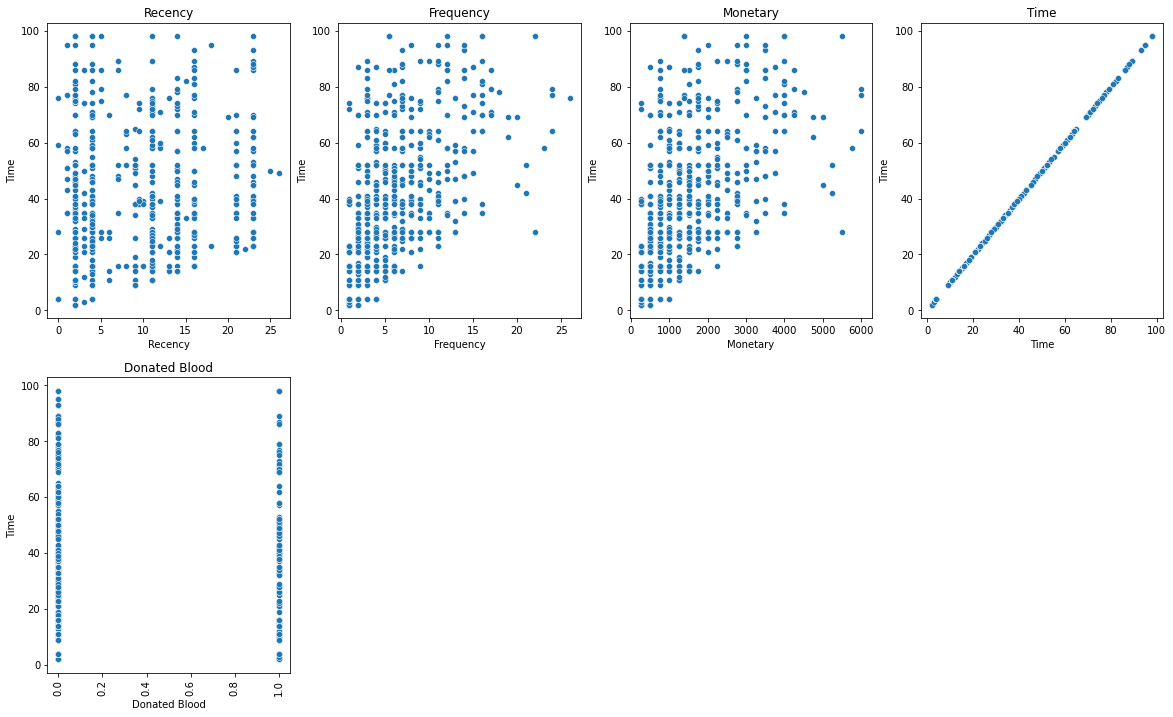

In [42]:
import seaborn as sns
plt.figure(figsize=(20,25))
for i, col in enumerate(fake_transfusion.columns):
    plt.subplot(4,4,i+1)
    sns.scatterplot(data=fake_transfusion, x=col, y='Time')
    plt.title(col)

plt.xticks(rotation='vertical')
plt.show()

# Multiple Relationship Donated blood in 2007 vs others

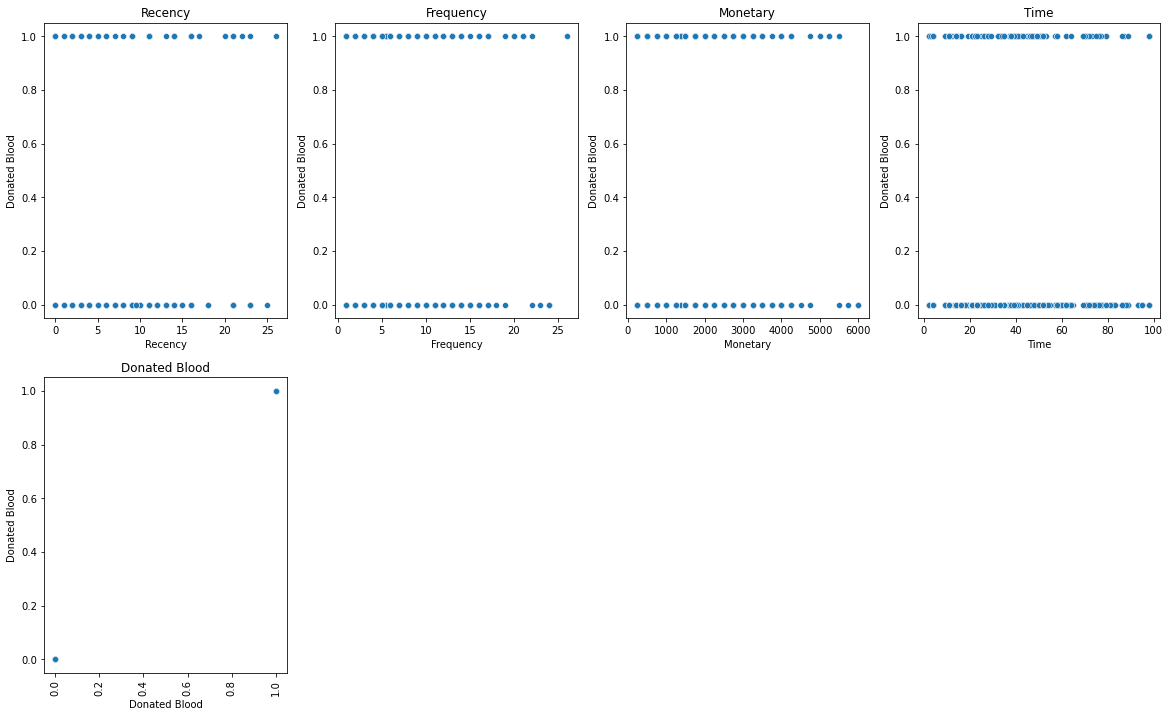

In [43]:
import seaborn as sns
plt.figure(figsize=(20,25))
for i, col in enumerate(fake_transfusion.columns):
    plt.subplot(4,4,i+1)
    sns.scatterplot(data=fake_transfusion, x=col, y='Donated Blood')
    plt.title(col)

plt.xticks(rotation='vertical')
plt.show()

# Multiple Relationship

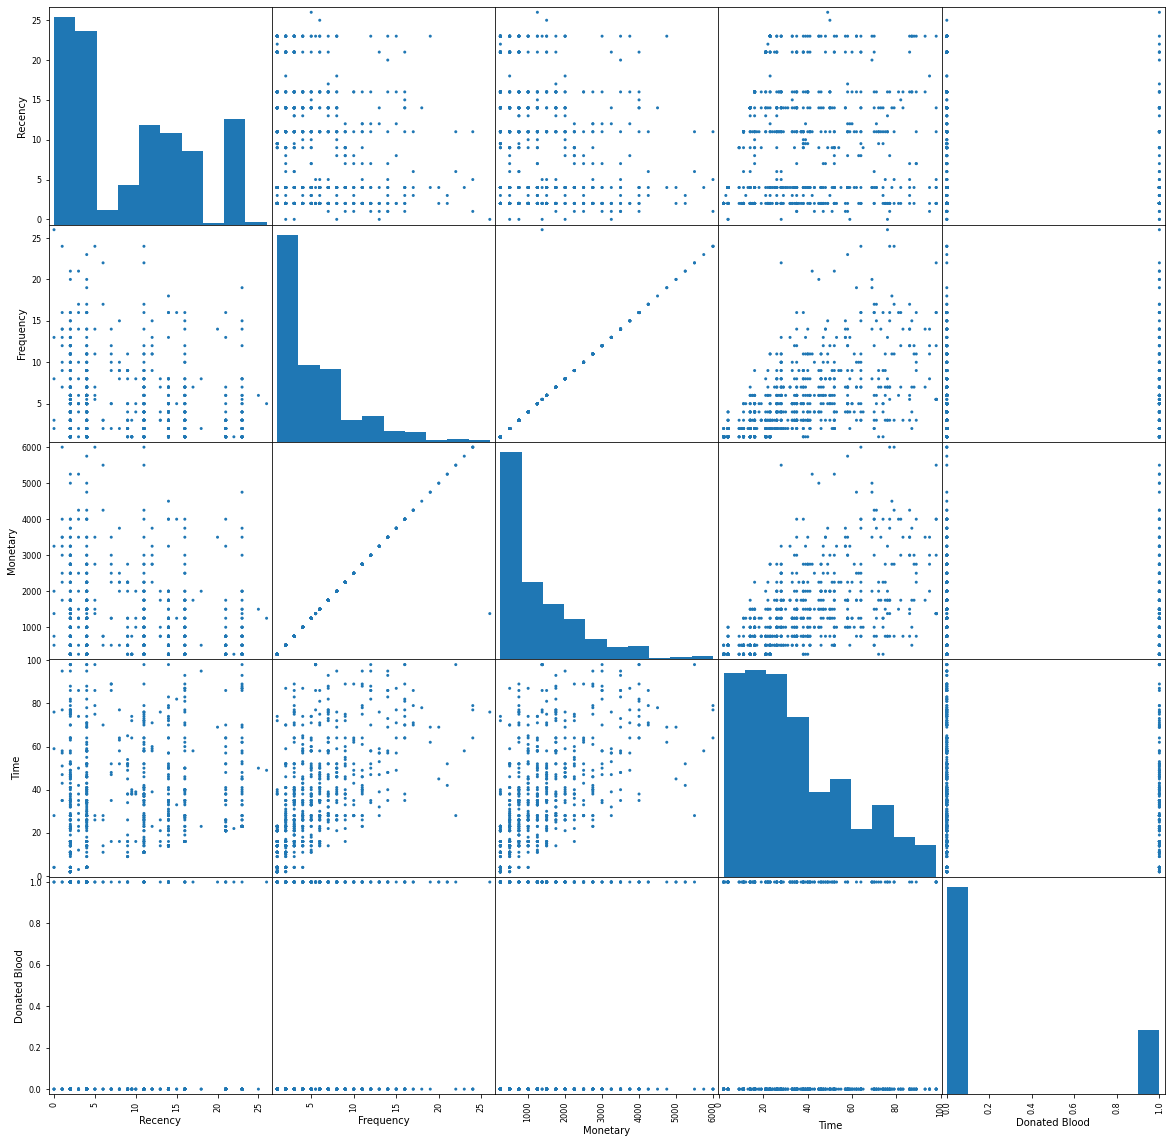

In [44]:
from pandas.plotting import scatter_matrix
scatter_matrix(fake_transfusion,alpha=1,figsize=(20,20),diagonal='hist')
plt.show()

> This scatter matrix plot shows that there is a linear relationship between the time and monetary.

# Relationship between the frequency and time

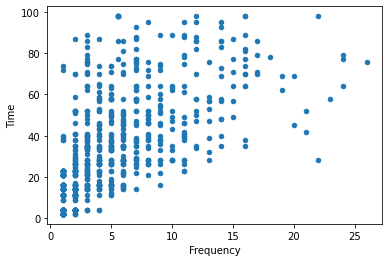

In [45]:
fake_transfusion.plot(kind='scatter',x='Frequency',y='Time')
plt.show()

# Relationship between the Monetary and time


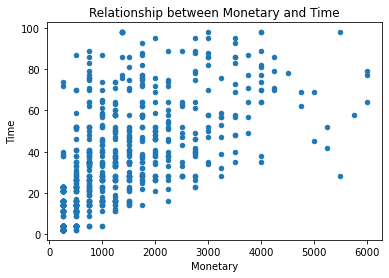

In [46]:
fake_transfusion.plot(kind='scatter',x='Monetary',y='Time')
plt.title('Relationship between Monetary and Time')
plt.show()

# Relationship between Monetary and Recency

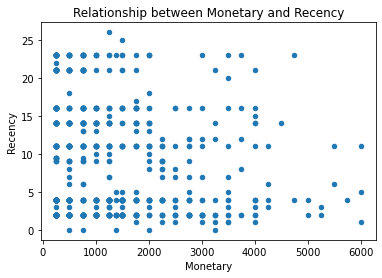

In [47]:

fake_transfusion.plot(kind='scatter',x='Monetary',y='Recency')
plt.title('Relationship between Monetary and Recency')
plt.show()

# Relationship between the frequency and Monetary

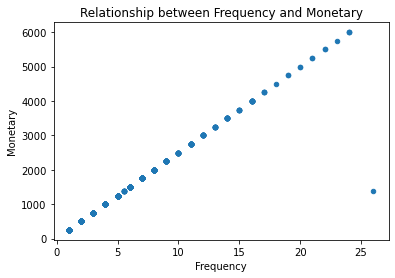

In [48]:

fake_transfusion.plot(kind='scatter',x='Frequency',y='Monetary')
plt.title('Relationship between Frequency and Monetary')
plt.show()

> This plot clearly shows that the Highly linear relationship between the frequency and Monetary,

# Relationship between the frequency and Recency


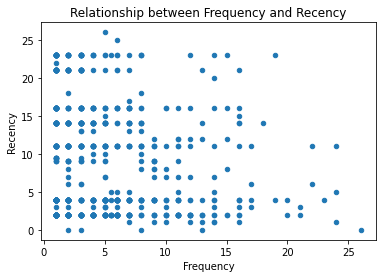

In [49]:

fake_transfusion.plot(kind='scatter',x='Frequency',y='Recency')
plt.title('Relationship between Frequency and Recency')
plt.show()

# Relationship between the Time and Recency



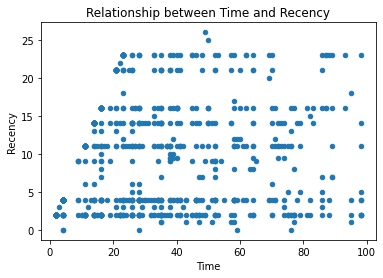

In [50]:

fake_transfusion.plot(kind='scatter',x='Time',y='Recency')
plt.title('Relationship between Time and Recency')
plt.show()

# Relationship between Donated Blood and Frequency

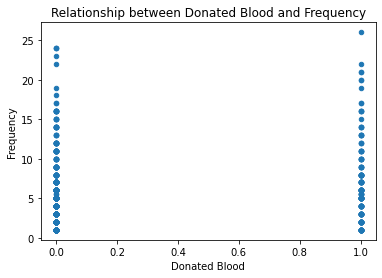

In [51]:
fake_transfusion.plot(kind='scatter',x='Donated Blood',y='Frequency')
plt.title('Relationship between Donated Blood and Frequency')
plt.show()

# Relationship between Donated Blood and Recency

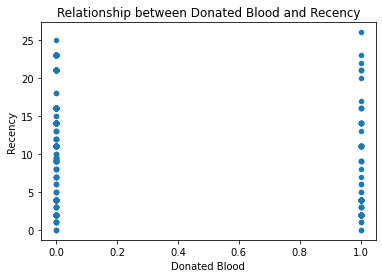

In [52]:
fake_transfusion.plot(kind='scatter',x='Donated Blood',y='Recency')
plt.title('Relationship between Donated Blood and Recency')

plt.show()

# Relationship between Donated Blood and Time

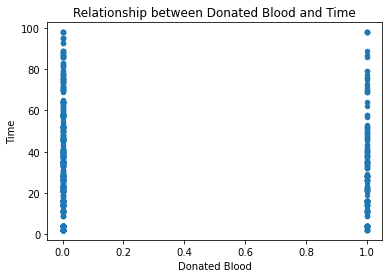

In [53]:
fake_transfusion.plot(kind='scatter',x='Donated Blood',y='Time')
plt.title('Relationship between Donated Blood and Time')


plt.show()

# Relationship between Donated Blood and Monetary

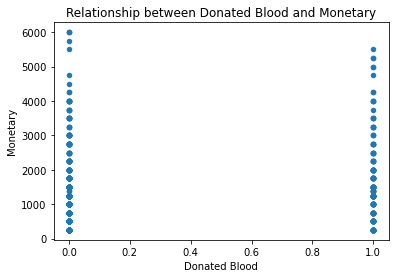

In [54]:
fake_transfusion.plot(kind='scatter',x='Donated Blood',y='Monetary')
plt.title('Relationship between Donated Blood and Monetary')


plt.show()

# Filter Features by Corerelation

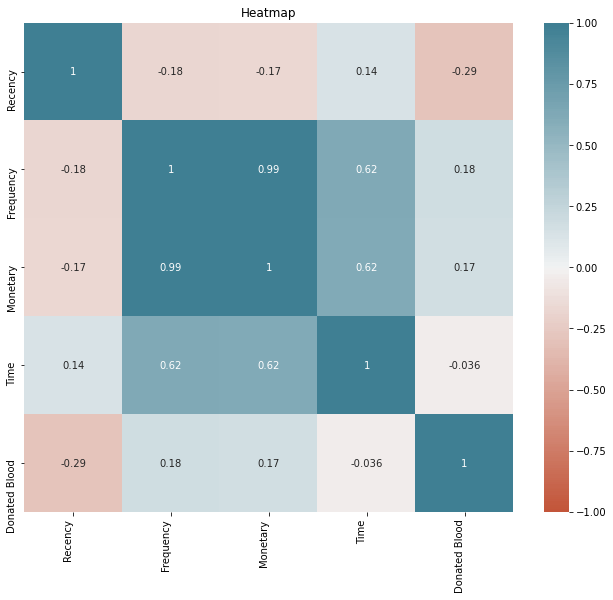

In [55]:
f, ax = plt.subplots(figsize=(11, 9))
corr = fake_transfusion.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

plt.title('Heatmap')
plt.show()

# Baseline Model

# F1 score calculation methods

In [56]:
from sklearn.metrics import f1_score

def get_f1_scores(clf, train_X, train_y, val_X, val_y):
    train_pred = clf.predict(train_X)
    val_pred = clf.predict(val_X)
    
    train_f1 = f1_score(train_y, train_pred, average='macro')
    val_f1 = f1_score(val_y, val_pred, average='macro')
    
    return train_f1, val_f1



# Train Test Split

In [57]:
from sklearn.model_selection import train_test_split


In [58]:
X = fake_transfusion.drop(columns = ['Donated Blood'],axis=1)
y = fake_transfusion['Donated Blood']


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,shuffle=True,random_state=4)

In [60]:
X_train.shape

(561, 4)

In [61]:
X_test.shape

(187, 4)

In [62]:
y_train.shape

(561,)

In [63]:
y_test.shape

(187,)

In [64]:
train_X = X_train.copy()
test_X = X_test.copy()

train_y = y_train.copy()
test_y = y_test.copy()

# Model selection

1. K-Nearest Neighbours
2. Decision Tree


# K-Nearest Neighbours

In [65]:

from sklearn.neighbors import KNeighborsClassifier


In [66]:
clf = KNeighborsClassifier(3)


In [67]:
clf.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [68]:
predicted = clf.predict(X_test)


In [69]:
predicted


array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [70]:
from sklearn.metrics import confusion_matrix


In [71]:
cm = confusion_matrix(y_test,predicted)


In [72]:
print(cm)

[[122  17]
 [ 36  12]]


In [73]:
from sklearn.metrics import classification_report


In [74]:
print(classification_report(y_test,predicted))


              precision    recall  f1-score   support

           0       0.77      0.88      0.82       139
           1       0.41      0.25      0.31        48

    accuracy                           0.72       187
   macro avg       0.59      0.56      0.57       187
weighted avg       0.68      0.72      0.69       187



In [75]:

print("[Train/test split] score: {:.5f}".format(clf.score(X_test, y_test)))

[Train/test split] score: 0.71658


In [76]:
# F1 score 

In [77]:
train_f1, val_f1 = get_f1_scores(clf, X_train, y_train,X_test, y_test)
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Test F1-Score score: {:.3f}".format(val_f1))

Train F1-Score score: 0.779
Test F1-Score score: 0.567


Since we are using K-nearest Neighbour Modeling technique to predict our target variable "Donated Blood" in 2007 or not?
First we tried with the small value of neighbour k = 3 gives
confusion matrix, 

[[122  17]

 [ 36  12]]
 
an F1-score value of , 
Train F1-Score score: 0.779
Test F1-Score score: 0.567
This value shows that the huge gap between the train and test score concludes the train set overfit the test set data.


# K vs Error rate 

Text(0, 0.5, 'Error rate')

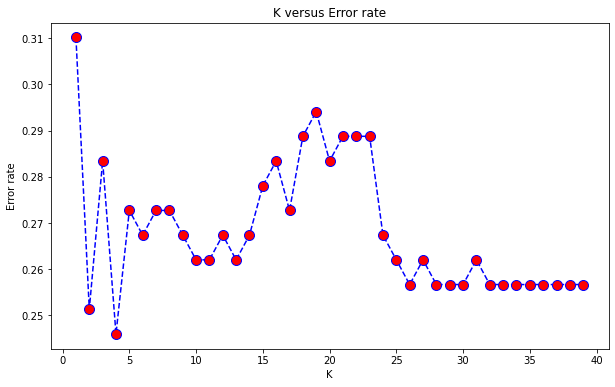

In [78]:

error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    
    error_rate.append(np.mean(pred_i != y_test))
    
   
plt.figure(figsize=(10, 6))

plt.plot(range(1, 40), error_rate, color='blue', linestyle='--',
         markersize=10, markerfacecolor='red', marker='o')
plt.title('K versus Error rate')
plt.xlabel('K')
plt.ylabel('Error rate')


This plot shows that choosing a value of k = 5 would result low rate of error, Let's try with the different hyperparameter to tune the model for better performance.


# Parameter Tuning


 Let's add additional parameters(Weights, p) with different value with higher prediction rate.


In [79]:
#Let's put neighbour value of 5.

In [80]:
clf = KNeighborsClassifier(leaf_size=15, metric='minkowski', n_neighbors=5, p=1,
 weights='uniform')


In [81]:
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

In [82]:
train_f1, val_f1 = get_f1_scores(clf, X_train, y_train,X_test, y_test)
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Test F1-Score score: {:.3f}".format(val_f1))

Train F1-Score score: 0.742
Test F1-Score score: 0.604


In [83]:
cm = confusion_matrix(y_test,predicted)
print(cm)


[[125  14]
 [ 34  14]]


<AxesSubplot:>

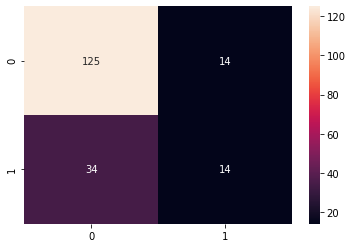

In [84]:
sns.heatmap(confusion_matrix(y_test,predicted), annot = True, fmt = "d")

In [85]:
print(classification_report(y_test,predicted))


              precision    recall  f1-score   support

           0       0.79      0.90      0.84       139
           1       0.50      0.29      0.37        48

    accuracy                           0.74       187
   macro avg       0.64      0.60      0.60       187
weighted avg       0.71      0.74      0.72       187



When setting up neighbour = 3 resulted precision value of 77% , recall 88% and accuracy 72% with overfitting result.

After changing the neighbour = 5, improved precision value of 79%, recall 90% and accuracy 74% with slight improvement of gap between the test and train which is still the overfitting. 

# Hill Climbing Feature Selection Algorithms
Let's select the best features among the given attributes which provided the better result using HIll Climbing Algorithms


In [86]:
from sklearn.utils import shuffle


In [87]:

col_num = X.shape[1]

new_Ind = []
cur_MaxScore = 0.0
col_Ind_Random = shuffle(range(0, col_num), random_state = 4)

for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = X.iloc[:, new_Ind].copy()
    X_train, X_test, y_train, y_test = train_test_split(newData, y , test_size = .25, random_state = 0)
    clf = KNeighborsClassifier(leaf_size=15, metric='minkowski', n_neighbors=5, p=1,
 weights='uniform')
    fit = clf.fit(X_train, y_train)
    cur_score = clf.score(X_test, y_test)
    if cur_score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_score
        print("score with " + str(len(new_Ind)) + " selected features "+ str(cur_score))
        
        

score with 1 selected features 0.6737967914438503
score with 2 selected features 0.7433155080213903


This Concludes that selecting multiple feature improves the score than selecting a single feature.



# K- Fold Validation
Validating above result with the k -fold validation by changing test and train set from the original datasets. 

In [88]:
from sklearn.model_selection import KFold


In [89]:
 kf = KFold(n_splits=5,random_state=4, shuffle=True)
    

In [90]:
#run the KFlod cross validation
sum = 0
count = 0
for k, (train_index, test_index) in enumerate(kf.split(X)):
 
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    sum +=  clf.score(X_test, y_test)
    count += 1

print("Average score ",(sum / count))
    

[fold 0] score: 0.74000
[fold 1] score: 0.76000
[fold 2] score: 0.74000
[fold 3] score: 0.79866
[fold 4] score: 0.78523
Average score  0.7647785234899329


>This validate all the fold has approximate similar prediction of average score of 0.76.
                

# Descision Tree 

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
clf = DecisionTreeClassifier()

In [93]:
fit = clf.fit(train_X, train_y)


In [94]:
y_pre = fit.predict(test_X)


In [95]:
y_pre

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [96]:
y_pre.shape

(187,)

In [97]:
test_y

739    0
558    0
33     1
273    0
637    0
      ..
365    1
741    0
170    0
166    0
25     0
Name: Donated Blood, Length: 187, dtype: int64

In [98]:
print(classification_report(test_y,y_pre))

              precision    recall  f1-score   support

           0       0.77      0.84      0.81       139
           1       0.39      0.29      0.33        48

    accuracy                           0.70       187
   macro avg       0.58      0.57      0.57       187
weighted avg       0.68      0.70      0.69       187



In [99]:
train_f1, test_f1 = get_f1_scores(clf, train_X, train_y, test_X, test_y)
print("{}, {}".format(train_f1, test_f1))

0.9160410742648586, 0.5701149425287356


<AxesSubplot:>

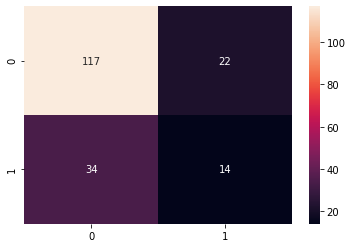

In [100]:
sns.heatmap(confusion_matrix(test_y,y_pre), annot = True, fmt = "d")

## Here the data is overfit. Thus we tune the parameters to obtain results with high precision 

In [111]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
clfs = []
train_scores = []
test_scores = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(train_X, train_y)
    train_f1, test_f1 = get_f1_scores(clf, train_X, train_y, test_X, test_y)
    clfs.append(clf)
    train_scores.append(train_f1)
    test_scores.append(test_f1)

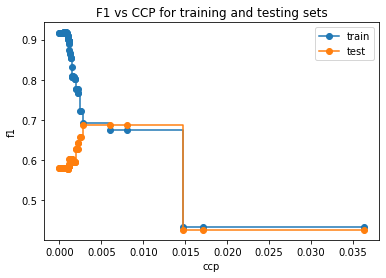

In [102]:
fig, ax = plt.subplots()
ax.set_xlabel("ccp")
ax.set_ylabel("f1")
ax.set_title("F1 vs CCP for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [114]:
max_index = test_scores.index(max(test_scores))
clf = clfs[max_index]
print("{} - {}".format(train_scores[max_index], test_scores[max_index]))

0.6914604236343367 - 0.6870628620467711


In [115]:
y_pre_tuned = clf.predict(test_X)
print(classification_report(test_y,y_pre_tuned))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       139
           1       0.65      0.42      0.51        48

    accuracy                           0.79       187
   macro avg       0.73      0.67      0.69       187
weighted avg       0.78      0.79      0.78       187



# Tree Visualization

In [105]:
feature_names = ['Recency', 'Frequency', 'Monetary', 'Time']
target_names  = ['Donated Blood']
list(X.columns)



['Recency', 'Frequency', 'Monetary', 'Time']

In [106]:
target_names

['Donated Blood']

In [107]:
X

,Recency,Frequency,Monetary,Time
0,2.000000,5.514706,1378.676471,98
1,0.000000,13.000000,3250.000000,28
2,1.000000,16.000000,4000.000000,35
3,2.000000,20.000000,5000.000000,45
4,1.000000,24.000000,6000.000000,77
...,...,...,...,...
743,23.000000,2.000000,500.000000,38
744,21.000000,2.000000,500.000000,52
745,23.000000,3.000000,750.000000,62
746,9.506684,1.000000,250.000000,39


In [108]:
clf

DecisionTreeClassifier(ccp_alpha=0.002861109705850934, random_state=0)

In [109]:
from sklearn.tree import export_graphviz
export_graphviz(clf, 'tree.dot', feature_names = list(X.columns))





In [110]:
! "C:\Program Files\Graphviz\bin\dot" -Tpng tree.dot -o tree.png

# Result

References: https://machinelearningmastery.com/hill-climb-the-test-set-for-machine-learning/

2. https://towardsdatascience.com/visualizing-decision-trees-in-jupyter-notebook-with-python-and-graphviz-78703230a7b1
